In [ ]:
pip install pip install mpl_finance

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [13]:
plt.style.use('ggplot')

df = pd.read_csv('NIFTY500.csv')
ohlc = df.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc.Date = pd.to_datetime(ohlc.Date, dayfirst=True)
ohlc.Date = ohlc.Date.apply(mpl_dates.date2num)

Plot of candlestick chart

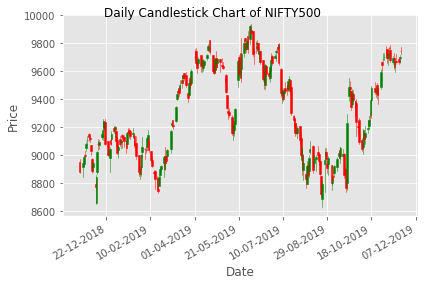

In [18]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc.values, width=2, colorup='green', colordown='red', alpha = 4)
###Setting labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY500')

###Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

RSI

In [ ]:
df2 = df
df2.index = pd.to_datetime(df2['Date'], dayfirst=True)
df2 = df2[['Close']]
df2.columns=['Close']
df2['Close']=pd.to_numeric(df2['Close'])
df2=df2['22-Nov-18':]

Exponential moving average and RSI 

In [ ]:
def get_Up(x):
    if x>=0:
        return x
    else:
        return 0
def get_Down(x):
    x=-x
    return get_Up(x)
df2['Change']=df2['Close'].diff()
df2['Up']=df2['Change'].apply(get_Up)
df2['Down']=df2['Change'].apply(get_Down)
df2['EMA_Up']=df2['Up'].ewm(span=14).mean()
df2['EMA_Down']=df2['Down'].ewm(span=14).mean()


df2['RS']=df2['EMA_Up'].div(df2['EMA_Down'])
df2['RSI']=df2['RS'].apply(lambda RS:(RS/(1+RS))*100)

Signal

In [23]:
def get_status(y):
    if y>=70:
        return('overbought')   
    elif y<=30:
        return('oversold')
    else:
        return('NaN')        
df2['Status_RSI']=df2['RSI'].apply(get_status)
df2.head(50)

,Close,Change,Up,Down,EMA_Up,EMA_Down,RS,RSI,Status_RSI
Date,,,,,,,,,
2018-11-22,8879.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2018-11-26,8943.000000,64.000000,64.000000,0.000000,34.285714,0.000000,inf,NaN,NaN
2018-11-27,8983.900391,40.900391,40.900391,0.000000,36.812543,0.000000,inf,NaN,NaN
2018-11-28,8993.250000,9.349609,9.349609,0.000000,28.410857,0.000000,inf,NaN,NaN
2018-11-29,9081.849609,88.599609,88.599609,0.000000,44.114010,0.000000,inf,NaN,NaN
2018-11-30,9109.150391,27.300782,27.300782,0.000000,40.223729,0.000000,inf,NaN,NaN
2018-12-03,9126.900391,17.750000,17.750000,0.000000,35.488038,0.000000,inf,NaN,NaN
2018-12-04,9116.450195,-10.450196,0.000000,10.450196,28.547100,2.043904,13.966945,93.318610,overbought
2018-12-05,9029.450195,-87.000000,0.000000,87.000000,23.290915,17.686296,1.316890,56.838702,NaN


Plot

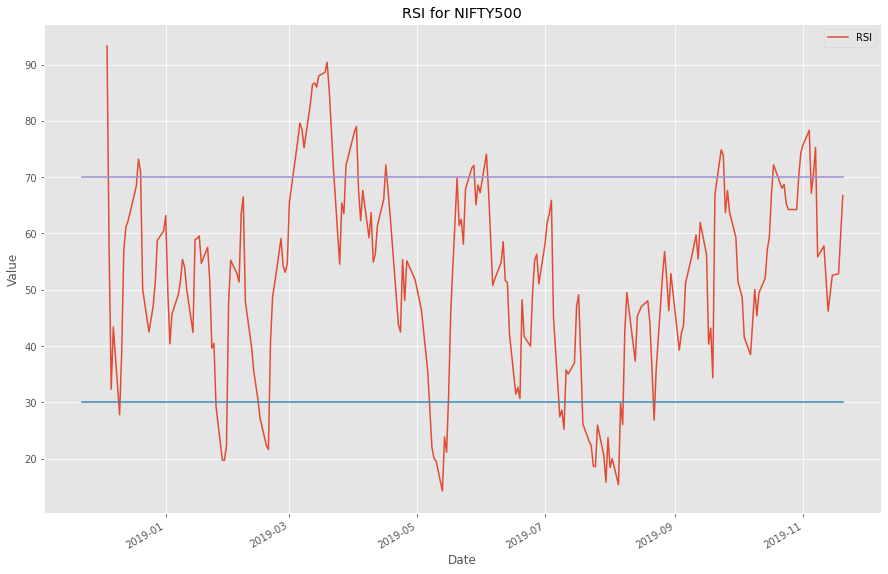

In [21]:
plt.figure(figsize=(15,10))
df2['RSI'].plot()
plt.plot(df2.index,[30]*len(df2.index))
plt.plot(df2.index,[70]*len(df2.index))
plt.title('RSI for NIFTY500')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()